# READ DATASET


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Feature data
y = diabetes.target  # Target labels

# Convert features and target into DataFrame
df_X = pd.DataFrame(X, columns=diabetes.feature_names)  # Feature DataFrame
df_y = pd.Series(y, name='diabetes_progression')  # Target Series

# Display first few rows of the features and target
df_X.head(), df_y.head()


(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: diabetes_progression, dtype: float64)

# DATA PRE-PROCESSING

In [ ]:
df_X.info()
df_y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,diabetes_progression
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [10]:
df_X.isnull().sum()
df_y.isnull().sum()
#mengecek missing value

0

In [14]:
df_y.unique()
#mengakses nilai yang unique di kolom diabetes progression

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [15]:
df_y.value_counts()
#menghitung masing masing nilai y

,count
diabetes_progression,
200.0,6
72.0,6
90.0,5
178.0,5
71.0,5
...,...
73.0,1
222.0,1
86.0,1


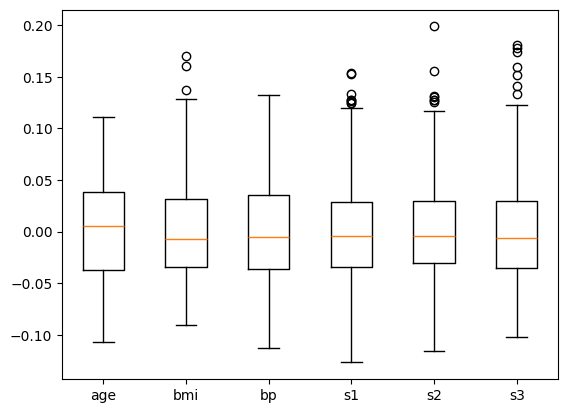

In [18]:
# Mengecek outlier
import matplotlib.pyplot as plt

# Memilih beberapa kolom yang relevan untuk dianalisis outliernya
# Corrected line: Accessing columns from df_X instead of df_y
plt.boxplot(df_X[['age', 'bmi', 'bp', 's1', 's2', 's3']])

# Memberi label pada sumbu x sesuai dengan urutan kolom yang dipilih
plt.xticks([1, 2, 3, 4, 5, 6], ['age', 'bmi', 'bp', 's1', 's2', 's3'])

# Menampilkan plot
plt.show()

# SPLIT DATA

In [20]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
# Use df_X instead of 'data' and specify feature names (diabetes.feature_names)
df_x = df_X[diabetes.feature_names]
df_y = df_y  # df_y already contains the target variable

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=100)

print(f"Number of train data: {len(x_train)}")
print(f"Number of testing data: {len(x_test)}")

Number of train data: 353
Number of testing data: 89


# TRAIN THE MODEL

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=100)

# Melatih model dengan data train
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

# PREDICT & EVALUATE

In [39]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data test
y_pred = model.predict(x_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 2.25%



# VISUALIZATION


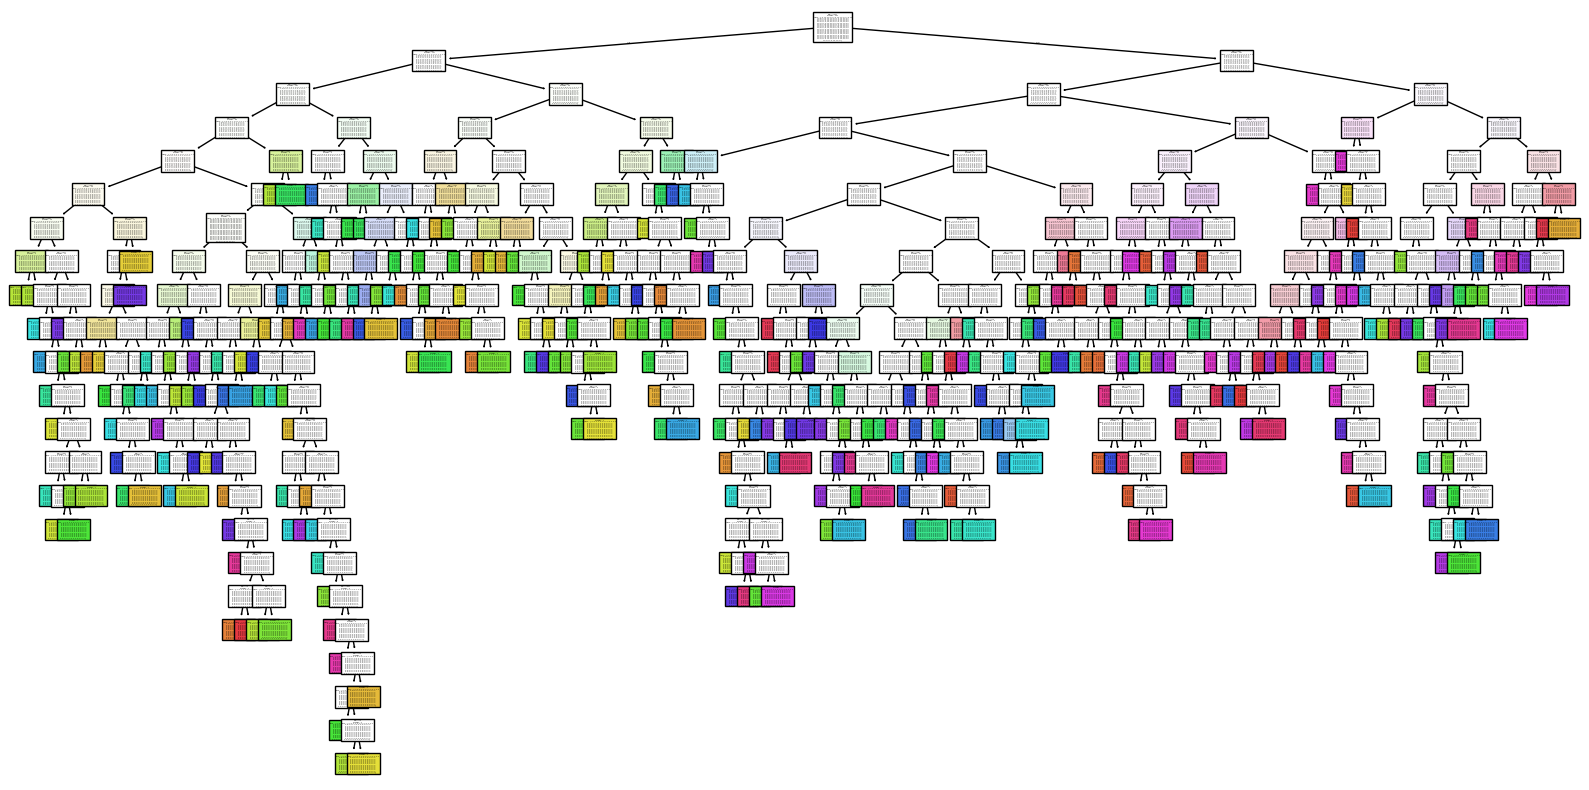

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model,
               feature_names=diabetes.feature_names,

               filled=True)
plt.show()